In [1]:
# Importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)     # Adjusts the configuration of the plots we'll create



# Read in the data

df = pd.read_csv(r"movies.csv",encoding='ISO-8859-1')


In [2]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [3]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

budget-0.0%
company-0.0%
country-0.0%
director-0.0%
genre-0.0%
gross-0.0%
name-0.0%
rating-0.0%
released-0.0%
runtime-0.0%
score-0.0%
star-0.0%
writer-0.0%
year-0.0%


In [4]:
# Data types for our columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [5]:
# Changing data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [6]:
df.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986


In [7]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

In [8]:
df.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986


In [38]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
# pd.set_option('display.max_rows',None)   To see/pull all records

In [15]:
# Drop any duplicates

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016,2016


Text(0, 0.5, 'Gross Earnings')

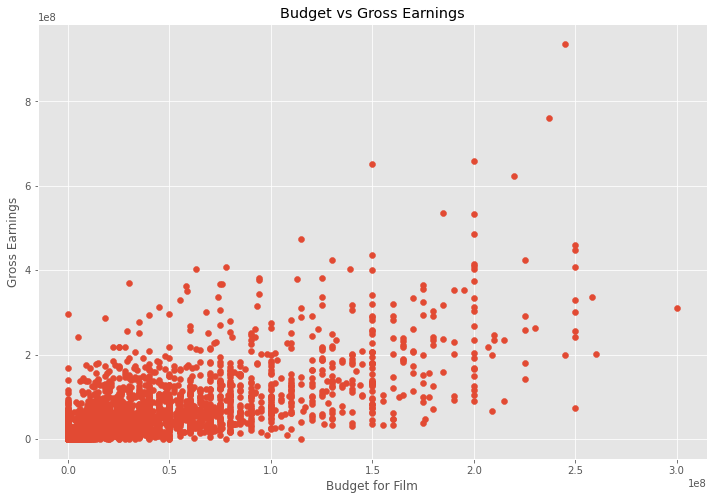

In [21]:
# Budget high correlation
# Company high correlation

# Scatter plot budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

In [20]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


<AxesSubplot:xlabel='budget', ylabel='gross'>

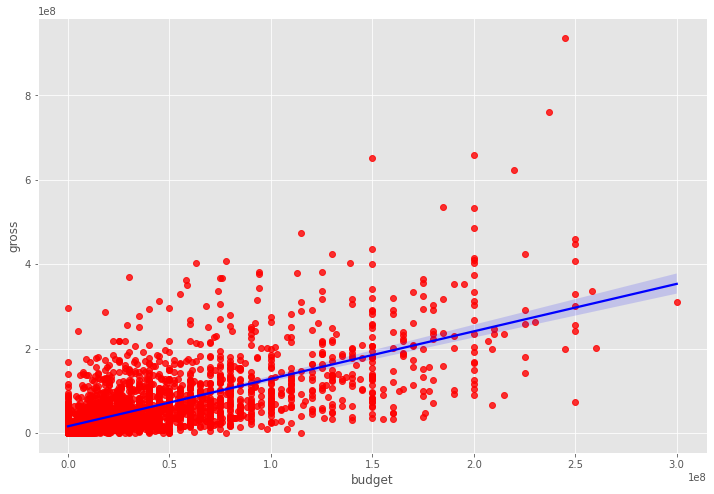

In [24]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [29]:
# Let's start looking at correlation

df.corr(method='pearson')         

,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


In [30]:
# High correlation bw budget and gross

Text(87.0, 0.5, 'Movie Features')

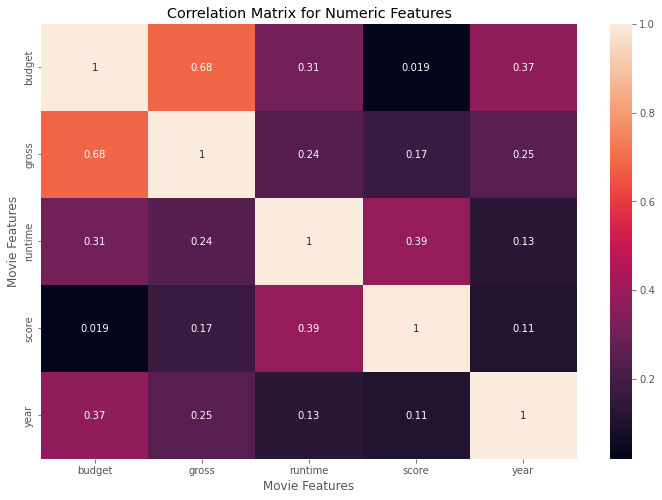

In [33]:
correlation_mtx = df.corr(method='pearson')  

sns.heatmap(correlation_mtx, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [34]:
# Looks at Company

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012,2012


In [48]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
            
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,1636,136,8.1,236,1106,2015,29
2302,237000000,837,36,478,0,760507625,219,5,1297,162,7.8,986,768,2009,23
1100,200000000,837,37,478,6,658672302,2852,5,643,194,7.8,699,768,1997,11
2916,150000000,846,37,207,0,652270625,1246,5,1606,124,7.0,203,1545,2015,29
2603,220000000,596,37,656,0,623357910,2276,5,1431,143,8.1,946,1010,2012,26


In [49]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year,yearcorrect
2903,245000000,574,37,468,0,936662225,2146,5,1636,136,8.1,236,1106,2015,29
2302,237000000,837,36,478,0,760507625,219,5,1297,162,7.8,986,768,2009,23
1100,200000000,837,37,478,6,658672302,2852,5,643,194,7.8,699,768,1997,11
2916,150000000,846,37,207,0,652270625,1246,5,1606,124,7.0,203,1545,2015,29
2603,220000000,596,37,656,0,623357910,2276,5,1431,143,8.1,946,1010,2012,26


Text(87.0, 0.5, 'Movie Features')

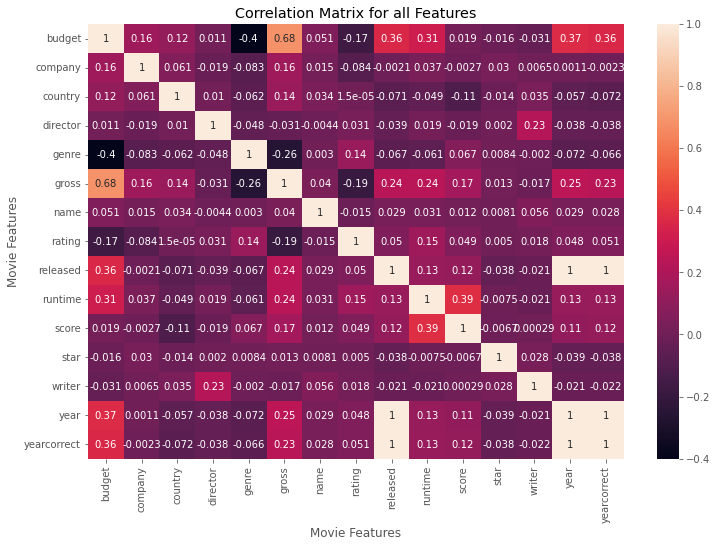

In [41]:
correlation_mtx = df_numerized.corr(method='pearson')  

sns.heatmap(correlation_mtx, annot=True)

plt.title('Correlation Matrix for all Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [43]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company        0.157083
             country        0.118863
             director       0.011052
             genre         -0.401052
                              ...   
yearcorrect  score          0.119861
             star          -0.038432
             writer        -0.021537
             year           0.996846
             yearcorrect    1.000000
Length: 225, dtype: float64

In [44]:
sorted_pairs = corr_pairs.sort_values()

In [45]:
sorted_pairs

genre        budget        -0.401052
budget       genre         -0.401052
genre        gross         -0.263051
gross        genre         -0.263051
             rating        -0.191666
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 225, dtype: float64

In [46]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]

In [47]:
high_corr

gross        budget         0.682588
budget       gross          0.682588
yearcorrect  year           0.996846
year         yearcorrect    0.996846
released     year           0.996873
year         released       0.996873
released     yearcorrect    0.999434
yearcorrect  released       0.999434
budget       budget         1.000000
rating       rating         1.000000
writer       writer         1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have highest correlation in gross earnings

# Company has low correlation
